# masks.ipynb

In [1]:
import cv2
import os
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from icecream import ic

In [4]:
FIRST_FRAME = 719
LAST_FRAME = 1540
IMAGE_DIR = 'frames'
TEMP_IMAGE_DIR = 'temp'
Y1 = 0
Y2 = 1080
X1 = 0
X2 = 960

# create new temp directory      
if os.path.exists(TEMP_IMAGE_DIR):
    shutil.rmtree(TEMP_IMAGE_DIR)
os.makedirs(TEMP_IMAGE_DIR)

for frame in range(FIRST_FRAME, LAST_FRAME+1):
    image_path = f'{IMAGE_DIR}/{frame:04d}.png'
    img = cv2.imread(f'{IMAGE_DIR}/{frame:04d}.png')
    img = cv2.rectangle(img, (Y1, X1), (X2, Y2), (0, 255, 0), 1)
    cv2.imwrite(image_path.replace(IMAGE_DIR, TEMP_IMAGE_DIR), img)  
    
print('FINISHED') 

FINISHED


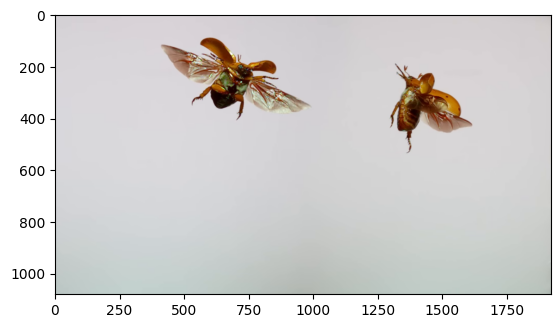

In [5]:
img = cv2.imread(f'{IMAGE_DIR}/{LAST_FRAME:04d}.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);


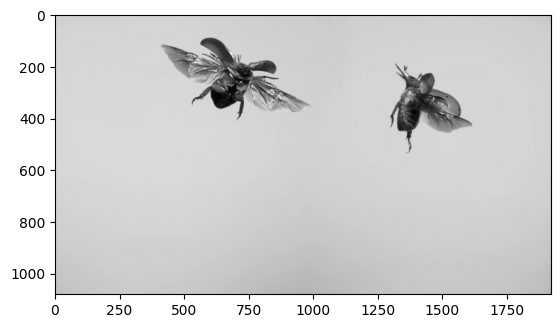

In [7]:

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray', vmin = 0, vmax = 255);

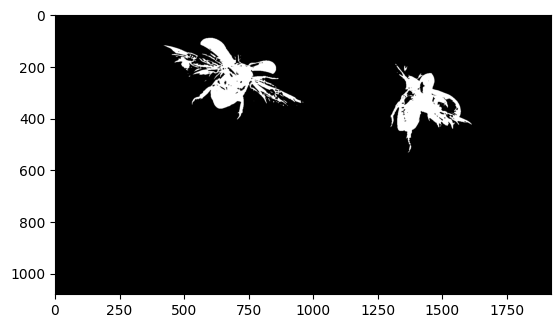

In [8]:

# Apply a binary threshold to get a binary image
_, binary = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY_INV)
# plt.imshow(binary)
plt.imshow(binary, cmap='gray', vmin = 0, vmax = 255);


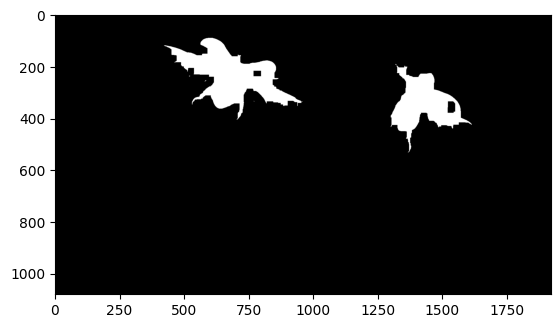

In [96]:
# Apply Dilate + Erode:
kernel = np.ones((5, 5), np.uint8)
binary = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel, iterations=5)
binary = cv2.morphologyEx(binary, cv2.MORPH_ERODE, kernel, iterations=5)
plt.imshow(binary, cmap='gray', vmin = 0, vmax = 255)

In [97]:
# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours

(array([[[768, 335]],
 
        [[768, 336]],
 
        [[769, 337]],
 
        [[769, 336]]], dtype=int32),
 array([[[582, 255]],
 
        [[578, 259]],
 
        [[580, 259]],
 
        [[580, 258]],
 
        [[581, 257]],
 
        [[583, 257]],
 
        [[583, 255]]], dtype=int32),
 array([[[518, 238]],
 
        [[518, 240]],
 
        [[519, 240]],
 
        [[520, 239]],
 
        [[521, 239]],
 
        [[521, 238]]], dtype=int32),
 array([[[1320,  199]],
 
        [[1320,  202]],
 
        [[1322,  204]],
 
        [[1322,  224]],
 
        [[1321,  225]],
 
        [[1321,  226]],
 
        [[1322,  227]],
 
        [[1329,  227]],
 
        [[1330,  228]],
 
        [[1330,  234]],
 
        [[1334,  238]],
 
        [[1335,  238]],
 
        [[1339,  242]],
 
        [[1340,  242]],
 
        [[1342,  244]],
 
        [[1342,  246]],
 
        [[1343,  247]],
 
        [[1345,  247]],
 
        [[1346,  248]],
 
        [[1347,  248]],
 
        [[1350,  251]],
 
       

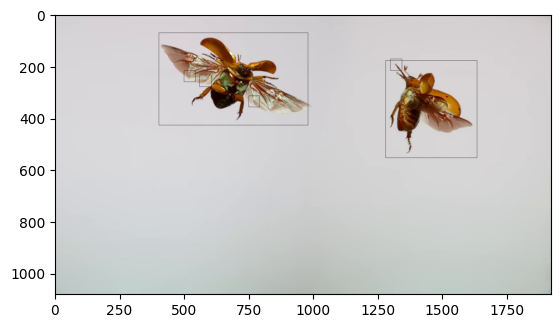

In [98]:

# Draw bounding boxes around the detected contours
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    padding = 20
    cv2.rectangle(img, (x-padding, y-padding), (x + w + padding, y + h + padding), (0,0,0), 1)
plt.imshow(img)    


# Save the image with bounding boxes
#cv2.imwrite(image_path.replace(IMAGE_DIR, TEMP_IMAGE_DIR), img)



In [99]:
def calc_bounding_boxes(image_path):
    """ returns bounding boxes for a single image """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # _, binary = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY_INV)
    _, binary = cv2.threshold(gray, 0, 255,	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    
    # Apply Dilate + Erode:
    kernel = np.ones((5, 5), np.uint8)
    binary = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel, iterations=5)
    binary = cv2.morphologyEx(binary, cv2.MORPH_ERODE, kernel, iterations=5)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        padding = 20
        bounding_boxes.append({'x1': x-padding, 'y1': y-padding, 'x2': x + w + padding, 'y2': y + h + padding})
    return bounding_boxes
    
ic(calc_bounding_boxes(f'{IMAGE_DIR}/{FIRST_FRAME:04d}.png'))
ic(calc_bounding_boxes(f'{IMAGE_DIR}/{LAST_FRAME:04d}.png'));


ic| calc_bounding_boxes(f'{IMAGE_DIR}/{FIRST_FRAME:04d}.png'): [{'x1': 144, 'x2': 225, 'y1': 1046, 'y2': 1100},
                                                                {'x1': 1894, 'x2': 1940, 'y1': 1045, 'y2': 1100},
                                                                {'x1': 1040, 'x2': 1445, 'y1': 725, 'y2': 1027},
                                                                {'x1': -20, 'x2': 450, 'y1': 704, 'y2': 1046}]
ic| calc_bounding_boxes(f'{IMAGE_DIR}/{LAST_FRAME:04d}.png'): [{'x1': 898, 'x2': 942, 'y1': 353, 'y2': 395},
                                                               {'x1': 747, 'x2': 795, 'y1': 312, 'y2': 363},
                                                               {'x1': 1276, 'x2': 1631, 'y1': 172, 'y2': 555},
                                                               {'x1': 395, 'x2': 993, 'y1': 71, 'y2': 428}]


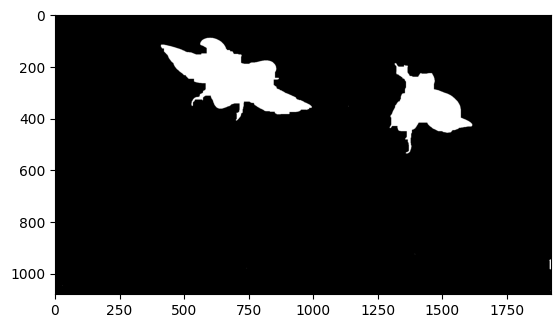

In [10]:
def threshold(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (7,7), 0)
    # _, binary = cv2.threshold(blurred, 0, 255,	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 2)
    # Apply Dilate + Erode:
    kernel = np.ones((5, 5), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel, iterations=5)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_ERODE, kernel, iterations=5)
    return thresh
    
image_path = f'{IMAGE_DIR}/{LAST_FRAME:04d}.png'
thresh = threshold(image_path)
plt.imshow(thresh, cmap='gray', vmin = 0, vmax = 255) 

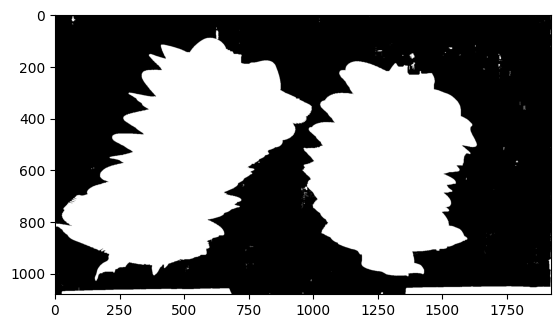

In [11]:
my_img = np.zeros((1080, 1920), np.uint8)
for frame in range(FIRST_FRAME, LAST_FRAME+1):
    thresh = threshold(f'{IMAGE_DIR}/{frame:04d}.png')
    my_img = cv2.bitwise_or(my_img, thresh)
          
plt.imshow(my_img, cmap='gray', vmin = 0, vmax = 255)

In [172]:
contours, _ = cv2.findContours(my_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=lambda x: cv2.contourArea(x))
ic(cv2.contourArea(sorted_contours[-1]))
ic(cv2.contourArea(sorted_contours[-2]));


ic| cv2.contourArea(sorted_contours[-1]): 461314.5
ic| cv2.contourArea(sorted_contours[-2]): 378436.5


ic| c_my_image.shape: (1080, 1920,

 3)


(1080, 1920, 3)

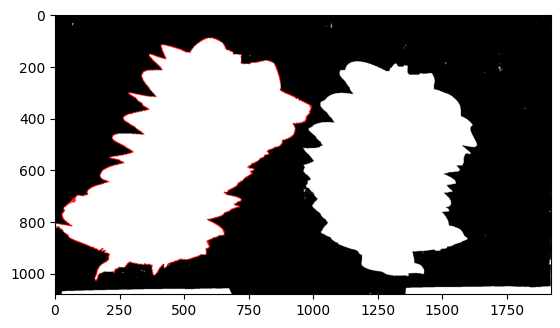

In [192]:
c_my_image = cv2.cvtColor(my_img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(c_my_image, sorted_contours[-1], -1, (255,0,0), 3) 
plt.imshow(c_my_image)
ic(c_my_image.shape)

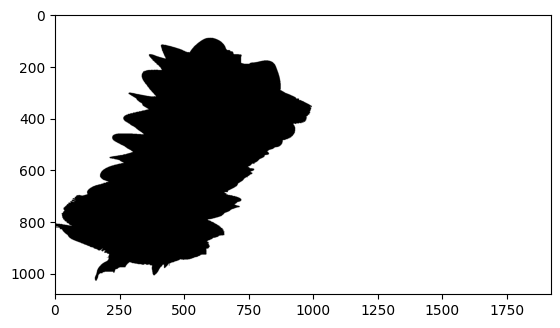

In [218]:
mask1 = np.zeros((1080, 1920), np.uint8)
cv2.drawContours(image=mask1, contours=[sorted_contours[-1]], contourIdx=-1, color=255, thickness=-1)
mask1 = 255 - mask1
plt.imshow(mask1, cmap='gray', vmin = 0, vmax = 255)


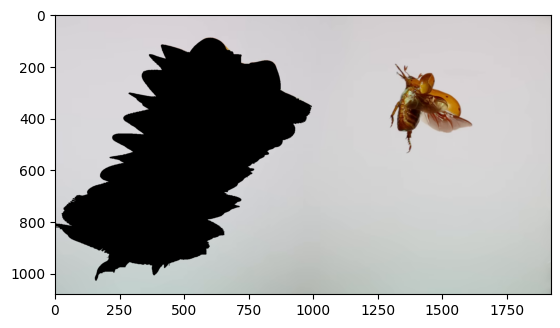

In [220]:
img = cv2.imread(f'{IMAGE_DIR}/{LAST_FRAME:04d}.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
masked = cv2.bitwise_and(img, img, mask=mask1)
plt.imshow(masked);
